# **Графические возможности библиотеки Matplotlib**

##### **НЕМНОГО О БИБЛИОТЕКЕ**
***

[Matplotlib](https://matplotlib.org/) — это библиотека Python, обладающая большим количеством возможностей для визуализации и настройки отображения графиков и диаграмм.

Установка библиотеки:

Строкой в терминале:  
*pip install matplotlib*

За визуализацию графиков в Matplotlib отвечает модуль *pyplot*. Традиционно он импортируется под псевдонимом *plt*. Для более корректного отображения графиков в ноутбуках используется команда *%matplotlib inline*.

Если вы используете тёмную тему в VS Code, то для корректного отображения графиков на тёмном фоне выполните следующую команду по установке стиля отображения:

*plt.style.use('default')*

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
covid_df = pd.read_csv('data/covid_merged.csv', sep=';')
covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


##### **ОСНОВНЫЕ ОБЪЕКТЫ MATPLOTLIB**
***

Библиотека Matplotlib позволяет работать в нескольких режимах. Самый распространённый и мощный по функционалу — **объектно-ориентированный** режим. Он основан на работе с объектами фигур (**figure**, их ещё называют канвасами или холстами) и координатных плоскостей (**axes**, или системы координат).

На рисунке ниже представлена визуализация основных компонентов графика в Matplotlib:

![Компоненты графика](https://lms.skillfactory.ru/assets/courseware/v1/d0c246229439d37c308aa7aed48a28e2/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-u1-md13_5_1.png)

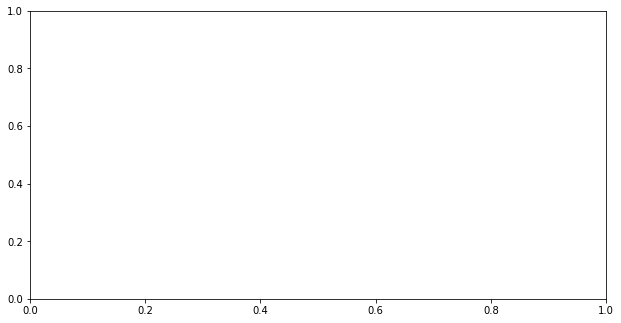

In [2]:
fig = plt.figure(figsize=(8, 4)) # создать объект, где будут настройки канваса
axes = fig.add_axes([0, 0, 1, 1]) # добавляется координатная плоскость (график будет строиться применительно к осям)
# [0, 0 - отступ от левого нижнего края, 1, 1 - доля от предоставленного пространства по Х и по У]

**ДИАГРАММА РАССЕЯНИЯ**
***

Утверждается, что коллективная вакцинация позволяет минимизировать риск заражения коронавирусной инфекцией (но только после второго компонента). Давайте проверим это на примере США: построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (daily_confirmed) от общего количества привитых вторым компонентом вакцины (people_fully_vaccinated) в США.

У объекта координатной плоскости axes вызовем метод

[**scatter()**](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html)

Основные параметры метода scatter():

* x, y — последовательности, которые будут отложены по осям абсцисс и ординат;
* s — размер маркеров;
* marker — вид маркеров ('o' — точки, '^' — треугольники (циркумфлекс));
* c — цвет маркеров.


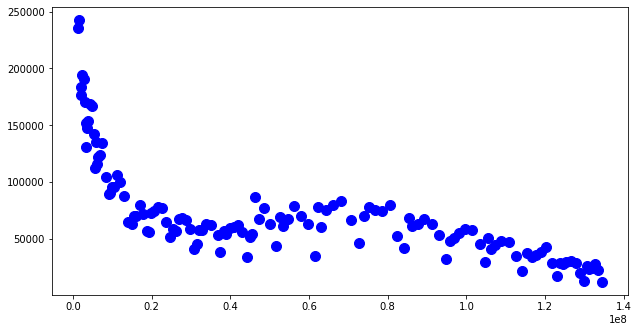

In [3]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
);

Из диаграммы видно, что, в основном, с ростом числа привитых вторым компонентом людей заболеваемость падает, замедляясь на уровне около 50 тысяч заболевших в день, и продолжает снижение дальше.

**КРУГОВАЯ ДИАГРАММА**
***

Для построения круговых диаграмм в Matplotlib используется метод

[**pie()**](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html)

Основные параметры метода pie():

* x — значения, по которым будет строиться круговая диаграмма;
* labels — метки, соответствующие значениям;
* autopct — формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака после запятой и при выводе будет указан знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "%");
* explode — последовательность, которая определяет долю смещения сектора от центра для каждого значения из x.

Построим круговую диаграмму, чтобы отобразить ТОП-10 комбинаций вакцин в мире.

Под «распространённостью» вакцины здесь подразумевается не количество введённых доз (таких данных у нас в таблице нет), а количество стран, в которых она используется. При этом подсчёт ведётся не по каждой отдельной вакцине, а по их комбинациям, и одна и та же вакцина учитывается несколько раз в сочетаниях с другими.


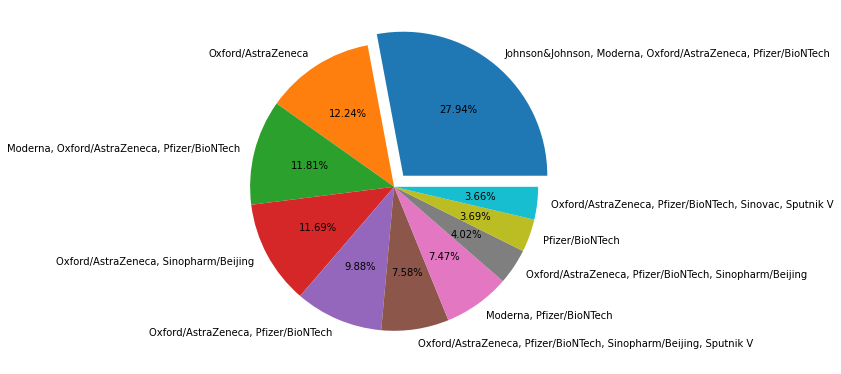

In [4]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10] # выводим первые 10 комбинаций вкалываемых вакцин по количеству их применения в разных странах
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations, # это икс
    labels=vaccine_combinations.index, # подписями станут индексы объекта сириэс, который мы только что собрали (это и есть сами комбинации)
    autopct='%.2f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0] # на 10 процентов вытащить из круга перый кусок
);

Самой распространённой комбинацией вакцин является комбинация: Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech. Причём можно заметить, что в большинстве популярных комбинаций присутствует вакцина Oxford/AstraZeneca.

Обратите внимание, что диаграмма показывает соотношение только для десяти популярных комбинаций вакцин, а не для всех вакцин в совокупности, что является не совсем корректным для круговой диаграммы, так как она должна отображать единое целое.

К тому же наша круговая диаграмма считает количество использований каждой комбинации в таблице, а не количество стран, в которых используется эта комбинация, что также является некорректным.

Более правильным вариантом в данном случае было бы выделить каждую вакцину в отдельности и посчитать, в скольких странах она используется.

Однако для этого нам необходимо будет совершить несколько довольно сложных преобразований:

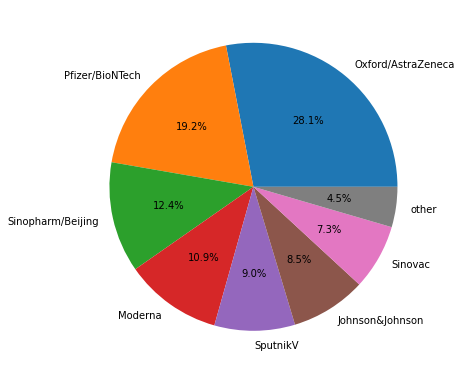

In [5]:
#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

##### **ДОБАВЛЕНИЕ ИНФОРМАТИВНОСТИ В ГРАФИКИ**
***
Управлять информативностью графика можно с помощью методов координатной плоскости 

[**axes**](https://matplotlib.org/stable/api/axes_api.html)

Некоторые из них:

* axes.set_title() — заголовок диаграммы, а также его настройки (например, параметр fontsize отвечает за размер шрифта);
* axes.set_xlabel() — название оси абсцисс;
* axes.set_ylabel() — название оси ординат;
* axes.set_xticks() — установка отметок на оси абсцисс;
* axes.set_yticks() — установка отметок на оси ординат;
* axes.xaxis.set_tick_params() — управление параметрами отметок на оси абсцисс (например, параметр rotation отвечает за поворот отметок в градусах);
* axes.yaxis.set_tick_params() — управление параметрами отметок на оси ординат;
* axes.legend() — отображение легенды;
* axes.grid() — установка сетки.

Например, изобразим на одном графике, как росла общая заболеваемость (confirmed), число зафиксированных смертей (deaths), выздоровевших пациентов (recovered) и активных случаев (active) в Китае.

**ЛИНЕЙНЫЙ ГРАФИК**
***

Для построения линейных графиков в Matplotlib используется метод

[**plot()**](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)

(не путайте с методом plot() в Pandas!). При вызове метода без параметров по оси абсцисс откладываются значения столбца таблицы, по оси ординат — индексы (в нашем случае это будут даты).

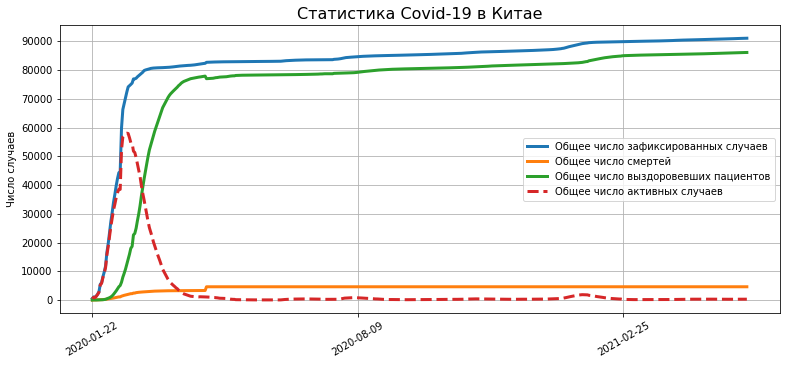

In [7]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
#axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.xaxis.set_major_locator(plt.MaxNLocator(3)) # 3 - это количество показываемых точек на нижней оси х
axes.grid()
axes.legend();

##### **ИСПОЛЬЗОВАНИЕ НЕСКОЛЬКИХ СИСТЕМ КООРДИНАТ**
***

Вы можете размещать несколько систем координат на одной фигуре, что позволит нам отображать вспомогательную информацию на основном графике.  
Для добавления второй системы координат необходимо повторно применить к объекту fig метод add_axes, указав новое имя для второй системы координат.

Например, отобразим ТОП-5 стран по общему числу привитых вторым компонентом людей (people_fully_vaccinated), а также ТОП-5 стран по числу полностью привитых на 100 человек населения (people_fully_vaccinated_per_hundred)

**СТОЛБЧАТАЯ ДИАГРАММА**
***

[**bar()**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

Основные параметры метода bar():

* x — названия категорий, которые будут располагаться по оси абсцисс;
* height — высота столбцов диаграммы, массив из показателей для визуализации (например, среднее, максимальное значение и т. д.);
* width — ширина столбцов диаграммы;
* color — цвет.

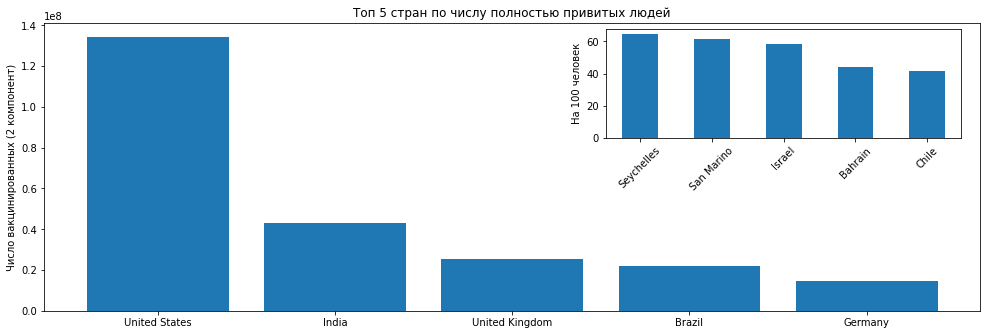

In [8]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5) # получаем 5 наибольших по кол-ву полностью вакцинированных стран
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5) # получаем 5 наибольших по доле от населения полностью вакцинированных стран

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38]) # первые два числа - отступ снизу и слева, след два числа - ширина и высота отностиельно всего пространства (в долях единицы)
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

Нетрудно заметить, что два представленных рейтинга отличаются: лидером по числу полностью привитых является США, а вот по числу вакцин на 100 человек населения — Сейшелы. В первый список попали страны с большим количеством населения, которое они активно прививают. Во второй список попали маленькие страны, которые проще всего обеспечить вакциной.

##### **SUBPLOTS**
***

Создание дополнительных систем координат с помощью метода add_axes() полезно, однако используется не так часто.

В большинстве случаев для отображения нескольких систем координат используется функция

[**subplots()**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

Она создаёт целую таблицу из систем координат на одной фигуре. Функция возвращает новую фигуру, а также список координатных плоскостей.

Основные параметры метода subplots():

* nrows — число строк;
* ncols — число столбцов;
* figsize — общий размер фигуры в дюймах (ширина и высота).

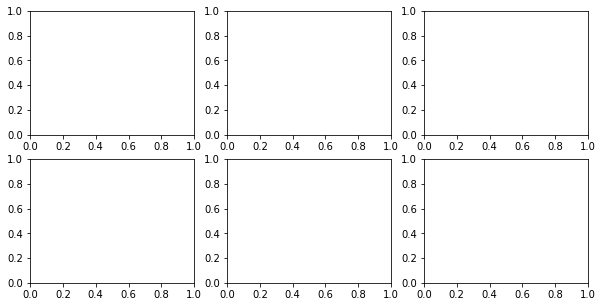

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5)) # матрица из графиков 2*3

**ГИСТОГРАММА**
***

За построение гистограмм в библиотеке Matplotlib отвечает метод

[**hist()**](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html)

Основные параметры метода hist():

* x — массив чисел, для которого строится гистограмма;
* bins — число столбцов (корзин);
* orientation — ориентация гистограммы (по умолчанию 'vertical');
* color — цвет.

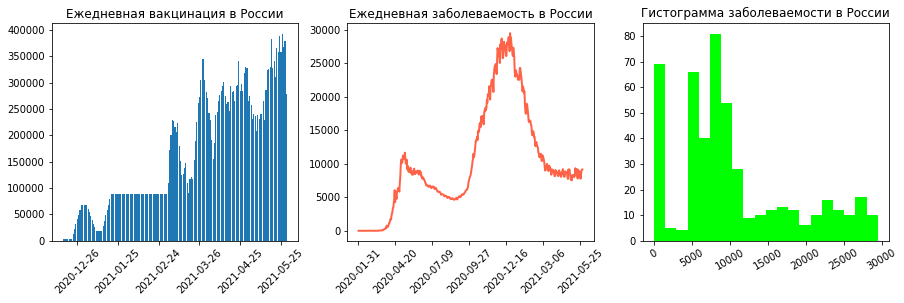

In [15]:
russia_data = covid_df[covid_df["country"] == "Russia"] # отбираем всю инфу по рашке

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4)) # задаём 3 колонки

# столбчатая диаграмма - динамика кол-ва вакцинированных ежедневно
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)
axes[0].xaxis.set
axes[0].xaxis.set_major_locator(plt.MaxNLocator(7))

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)
axes[1].xaxis.set_major_locator(plt.MaxNLocator(7))

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

На первом графике можно наблюдать колеблющийся рост числа ежедневно вакцинированных людей. Особенно в глаза бросается «пенёк» в период с конца января до начала марта 2021 года. Это период, когда данные о процессе вакцинации людей не обновлялись.

На втором графике мы видим две волны коронавируса в России. Первая — в середине марта 2020 года, которая достигла максимума в 13 тысяч заболевших за сутки. Вторая волна, судя по графику, началась в октябре 2020 года и достигла своего пика почти в 30 тысяч заболевших за сутки в конце декабря этого же года (точные данные: 24 декабря было зафиксировано рекордное число подтверждённых случаев: 29935).

Далее с ростом показателей вакцинации и введением новых карантинных мер заболеваемость снова постепенно снижается.

На третьем графике можно увидеть, что большая часть наблюдений ежедневной заболеваемости находится в интервале от 5 до до 10 тысяч человек в день. Ещё один пик гистограммы находится около 0 — это случаи, зафиксированные на начальных этапах эпидемии (в Россию Covid-19 пришёл позже, чем во многие другие страны).